# Pythonによる画像処理演習3

## 到達目標
- Python+openCV環境で簡単な画像処理プログラムを作成できる

# 周波数フィルタリング
### （例１）以下のコードはローパスフィルターをグレースケール画像に適用する例を示す．
- 画像のフーリエ変換はnumpyのライブラリnumpy.fft2を用いる
- フーリエ変換後の第1象限と第4象限、第2象限と第3象限の入れ替えは，numpy.fft..
- ローパスフィルタは次式を用いる.$R$は定数とする．
$$
H_{low}(u,v) = 
    \begin{cases}
        1 \quad (\sqrt{u^2+v^2} \geq R) \\
        0 \quad (\sqrt{u^2+v^2} \lt R) 
    \end{cases}
$$




In [215]:
#Ex例　ローパスフィルタ

import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [216]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"

In [217]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
#img = cv2.resize(img , (int(img.shape[1]*0.2), int(img.shape[0]*0.2)))
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [218]:
#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_filter = np.zeros( (H,W), float)
img_filtering_result = np.zeros( (H,W), complex)
img_out = np.zeros( (H,W), float )


In [219]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [220]:
#フーリエ変換
fimage = np.fft.fft2(img_gray)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル

In [221]:
#fimageの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
fimage = np.fft.fft2(img_gray)
fimage = np.fft.fftshift(fimage)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル
fimage_amplitude_spectrum[fimage_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

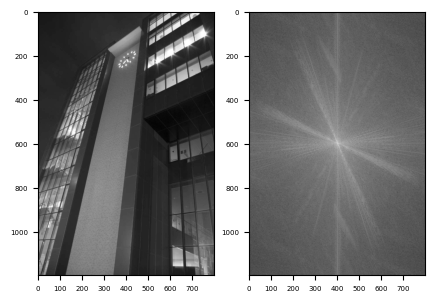

In [222]:
#振幅スペクトルの表示
#img = img[:, :, ::-1]  #BGR->RGB変換
plt.rcParams["font.size"] = 5
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))            # 元画像貼り付け
 
plt.gray()                                                 
plt.subplot(1, 2, 2), plt.imshow(20*np.log(fimage_amplitude_spectrum)) # 振幅スペクトル
plt.show()   

In [223]:
# ローパスフィルタ作成
# 周波数領域で中心部分だけ通し、他は０
center_W = W/2
center_H = H/2

R = 30
for v in range(H) :
    for u in range(W) :
            if (u-center_W)*(u-center_W) + (v-center_H)*(v-center_H) < R*R:
                 img_filter[v][u] = 1
            else:
                 img_filter[v][u] = 0

In [224]:
# ローパスフィルタ適用
img_filtering_result = fimage * img_filter
filtering_result_amplitude_spectrum = abs(img_filtering_result)  #振幅スペクトル
filtering_result_amplitude_spectrum[filtering_result_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

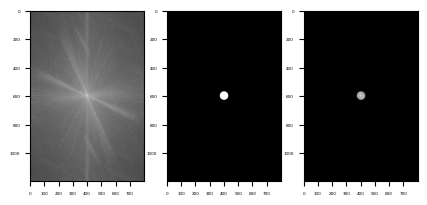

In [225]:
#ローパスフィルタ適用後の振幅スペクトルの表示
plt.rcParams["font.size"] = 3
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 3, 1), plt.imshow(20*np.log(fimage_amplitude_spectrum))            # 元画像の振幅スペクトル
plt.subplot(1, 3, 2), plt.imshow(img_filter)  # ローパスフィルタの振幅スペクトル                        
plt.subplot(1, 3, 3), plt.imshow(20*np.log(filtering_result_amplitude_spectrum)) # ローパスフィルタ適用後の振幅スペクトル
plt.show()  

In [226]:
#ローパスフィルタ適用後の出力画像をフーリエ逆変換により求める
img_filtering_result = np.fft.fftshift(img_filtering_result) #img_filtering_resultの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
ifimage = np.fft.ifft2(img_filtering_result) # フーリエ逆変換
img_out =ifimage.real #虚数部を除く

#print(img_out)

# Normalize to [0, 255]
vmin = np.amin(img_out)
vmax = np.amax(img_out)
img_out = 255*(img_out-vmin)/(vmax-vmin)

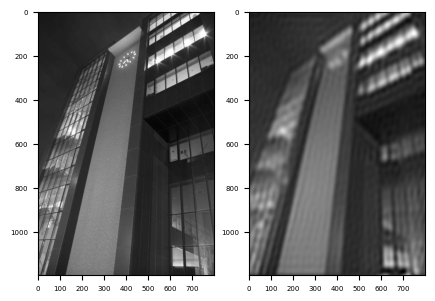

In [227]:
plt.rcParams["font.size"] = 5
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))            # 元画像貼り付け
 
plt.gray()                                                 
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out)) # ローパスフィルタ適用結果
plt.show()  

# EX7
# 周波数フィルタリング（ハイパスフィルタ）
## 以下のコードを完成してグレースケール画像にハイパスフィルタを適用した結果を表示してみよう．

- 画像のフーリエ変換はnumpyのライブラリnumpy.fft2を用いる
- フーリエ変換後の第1象限と第4象限、第2象限と第3象限の入れ替えは，numpy.fft.fftshiftを用いる.
- ハイパスフィルタは，（例1）のローパスフィルター$H_{low}(u,v)$から次式を利用して作成する．
$$
H_{high}(u,v) = 1 - H_{low}(u,v)
$$

In [228]:
import numpy as np
import sys
import cv2
import math
import matplotlib.pyplot as plt

In [229]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"

In [230]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [231]:
#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_low_pass_filter = np.zeros( (H,W), float)
img_hight_pass_filter = np.zeros( (H,W), float)
img_filtering_result = np.zeros( (H,W), complex)
img_out = np.zeros( (H,W), float )


In [232]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [233]:
#フーリエ変換
fimage = np.fft.fft2(img_gray)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル

In [234]:
#fimageの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
fimage = np.fft.fft2(img_gray)
fimage = np.fft.fftshift(fimage)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル
fimage_amplitude_spectrum[fimage_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

In [235]:
# ローパスフィルタ作成例
# 周波数領域で中心部分だけ通し、他は０
center_W = W/2
center_H = H/2

R = 20
for v in range(H) :
    for u in range(W) :
            if (u-center_W)*(u-center_W) + (v-center_H)*(v-center_H) < R*R:
                 img_low_pass_filter[v][u] = 1
            else:
                 img_low_pass_filter[v][u] = 0


In [236]:
# ハイパスフィルタ作成
center_W = W/2
center_H = H/2

#ここを編集
for v in range(H) :
    for u in range(W) :
        img_hight_pass_filter[v][u] = 1 - img_low_pass_filter[v][u]


In [237]:
# ハイパスフィルタ適用
img_filtering_result = fimage * img_hight_pass_filter
filtering_result_amplitude_spectrum = abs(img_filtering_result)  #振幅スペクトル
filtering_result_amplitude_spectrum[filtering_result_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

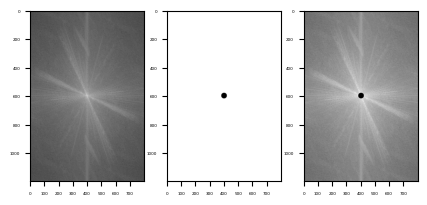

In [238]:
#ハイパスフィルタ適用後の振幅スペクトルの表示
plt.rcParams["font.size"] = 3
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 3, 1), plt.imshow(20*np.log(fimage_amplitude_spectrum))            # 元画像の振幅スペクトル
plt.subplot(1, 3, 2), plt.imshow(img_hight_pass_filter)  # ハイパスフィルタの振幅スペクトル                         
plt.subplot(1, 3, 3), plt.imshow(20*np.log(filtering_result_amplitude_spectrum)) # ハイパスフィルタ適用後の振幅スペクトル
plt.show()  

In [239]:
#ハイパスフィルタ適用後の出力画像をフーリエ逆変換により求める
img_filtering_result = np.fft.fftshift(img_filtering_result) #img_filtering_resultの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
ifimage = np.fft.ifft2(img_filtering_result) # フーリエ逆変換
img_out =ifimage.real #虚数部を除く

# Normalize to [0, 255]
vmin = np.amin(img_out)
vmax = np.amax(img_out)
img_out = 255*(img_out-vmin)/(vmax-vmin)

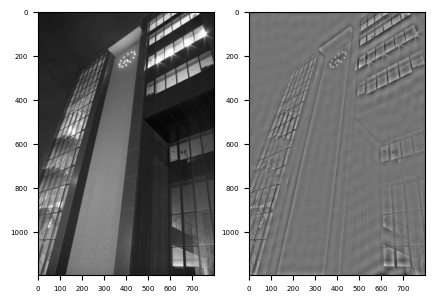

In [240]:
plt.rcParams["font.size"] = 5
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))            # 元画像貼り付け
 
plt.gray()                                                 
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out)) # ハイパスフィルタ適用結果
plt.show()  

# EX8
# 周波数フィルタリング（ラプラシアンフィルタ）
## 以下のコードを完成してグレースケール画像にラプラシアンフィルタを適用した結果を表示してみよう．

- 画像のフーリエ変換はnumpyのライブラリnumpy.fft2を用いる
- フーリエ変換後の第1象限と第4象限、第2象限と第3象限の入れ替えは，numpy.fft.fftshiftを用いる.
- ラプラシアンフィルタは，次式を利用する．$M$, $N$は，それぞれ，$u$, $v$軸方向の画像サイズを示す．
$$
H_{Laplacian}(u,v) = 2\left(
    cos\left(
            \frac{2\pi}{M}u
        \right) + 
    cos\left(
            \frac{2\pi}{N}v
        \right) 
    \right)
    -4
$$

In [241]:
import numpy as np
import sys
import cv2
import math
import matplotlib.pyplot as plt

In [242]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"

In [243]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
#検出したエッジが分かりやすいように縮小画像にする
img = cv2.resize(img , (int(img.shape[1]*0.2), int(img.shape[0]*0.2)))
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [244]:
#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_Laplacian_filter = np.zeros( (H,W), float)
img_filtering_result = np.zeros( (H,W), complex)
img_out = np.zeros( (H,W), float )

In [245]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [246]:
#フーリエ変換
fimage = np.fft.fft2(img_gray)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル

In [247]:
#fimageの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
fimage = np.fft.fft2(img_gray)
fimage = np.fft.fftshift(fimage)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル
fimage_amplitude_spectrum[fimage_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

In [248]:
#ラプラシアンフィルタ作成
center_W = W/2
center_H = H/2

#円周率はnp.pi
#cosθはnp.cos(θ)
#ここを編集
for v in range(H) :
    for u in range(W) :

      img_Laplacian_filter[v][u] = 2*(np.cos(2*np.pi*u/W)+np.sin(2*np.pi*v/H))

In [249]:
# ラプラシアンフィルタ適用
img_filtering_result = fimage * img_Laplacian_filter
filtering_result_amplitude_spectrum = abs(img_filtering_result)  #振幅スペクトル
filtering_result_amplitude_spectrum[filtering_result_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

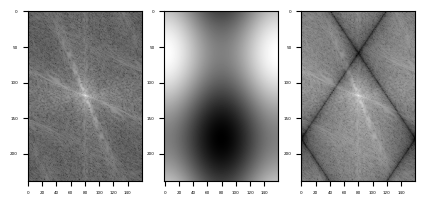

In [250]:
#ラプラシアンフィルタ適用後の振幅スペクトルの表示
plt.rcParams["font.size"] = 3
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 3, 1), plt.imshow(20*np.log(fimage_amplitude_spectrum))            # 元画像の振幅スペクトル
plt.subplot(1, 3, 2), plt.imshow(img_Laplacian_filter)  # ラプラシアンフィルタの振幅スペクトル                         
plt.subplot(1, 3, 3), plt.imshow(20*np.log(filtering_result_amplitude_spectrum)) # ハイパスフィルタ適用後の振幅スペクトル
plt.show() 

In [251]:
#ラプラシアンフィルタ適用後の出力画像をフーリエ逆変換により求める
img_filtering_result = np.fft.fftshift(img_filtering_result) #img_filtering_resultの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
ifimage = np.fft.ifft2(img_filtering_result) # フーリエ逆変換
img_out =ifimage.real #虚数部を除く

# Normalize to [0, 255]
vmin = np.amin(img_out)
vmax = np.amax(img_out)
img_out = 255*(img_out-vmin)/(vmax-vmin)

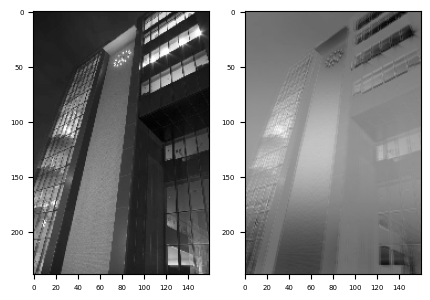

In [252]:
plt.rcParams["font.size"] = 5
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))            # 元画像貼り付け
 
plt.gray()                                                 
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out)) # ラプラシアンフィルタ適用結果
plt.show() 

# EX9
# 周波数フィルタリング（バンドパスフィルタ）
## 以下のコードを完成してグレースケール画像にバンドパスフィルタを適用した結果を表示してみよう．

- 画像のフーリエ変換はnumpyのライブラリnumpy.fft2を用いる
- フーリエ変換後の第1象限と第4象限、第2象限と第3象限の入れ替えは，numpy.fft.fftshiftを用いる.
- バンドパスフィルターは，次式を利用する．$M$, $N$は，それぞれ，$u$, $v$軸方向の画像サイズを示す．$\sigma$は定数を表す．
$$
H_{band}(u,v) = -4\pi^2\left( \left(\frac{2\pi}{M}u\right)^2+\left(\frac{2\pi}{N}v\right)^2\right)exp\left(-2\pi^2\sigma^2\left( \left(\frac{2\pi}{M}u\right)^2+\left(\frac{2\pi}{N}v\right)^2\right)\right)
$$

In [377]:
import numpy as np
import sys
import cv2
import math
import matplotlib.pyplot as plt

In [378]:
#入出力ファイル名指定
fname_in  = "./img_Ex1_in.jpg"

In [379]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [380]:
#出力画像を準備(float型)画像処理
img_gray = np.zeros( (H,W), float )
img_band_path_filter = np.zeros( (H,W), float)
img_filtering_result = np.zeros( (H,W), complex)
img_out = np.zeros( (H,W), float )

In [381]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [382]:
#フーリエ変換
fimage = np.fft.fft2(img_gray)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル

In [383]:
#fimageの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
fimage = np.fft.fft2(img_gray)
fimage = np.fft.fftshift(fimage)
fimage_amplitude_spectrum = abs(fimage)  #振幅スペクトル
fimage_amplitude_spectrum[fimage_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

In [384]:
#バンドパスフィルタ作成
center_W = W/2
center_H = H/2

sigma = 0.1
#ここを編集
#exp(x)はnp.exp(x)
for v in range(H) :
   for u in range(W) :
       img_band_path_filter[v][u] = -4*(np.pi**2)*(((2*np.pi*u/W)**2)+((2*np.pi*v/H)**2))*np.exp(-2*(np.pi**2)*(sigma**2)*((2*np.pi*u/W)**2+(2*np.pi*v/H)**2))

In [385]:
# バンドパスフィルタ適用
img_filtering_result = fimage * img_band_path_filter
filtering_result_amplitude_spectrum = abs(img_filtering_result)  #振幅スペクトル
filtering_result_amplitude_spectrum[filtering_result_amplitude_spectrum<1] = 1 #値が1より小さい場合の処理

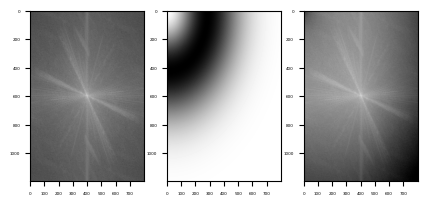

In [386]:
#バンドパスフィルタ適用後の振幅スペクトルの表示
plt.rcParams["font.size"] = 3
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 3, 1), plt.imshow(20*np.log(fimage_amplitude_spectrum))            # 元画像の振幅スペクトル
plt.subplot(1, 3, 2), plt.imshow(img_band_path_filter)  # ラプラシアンフィルタの振幅スペクトル                         
plt.subplot(1, 3, 3), plt.imshow(20*np.log(filtering_result_amplitude_spectrum)) # ハイパスフィルタ適用後の振幅スペクトル
plt.show() 

In [387]:
#バンドパスフィルタ適用後の出力画像をフーリエ逆変換により求める
img_filtering_result = np.fft.fftshift(img_filtering_result) #img_filtering_resultの第1象限と第4象限、第2象限と第3象限をそれぞれ入れ替える
ifimage = np.fft.ifft2(img_filtering_result) # フーリエ逆変換
img_out =ifimage.real #虚数部を除く

# Normalize to [0, 255]
vmin = np.amin(img_out)
vmax = np.amax(img_out)
img_out = 255*(img_out-vmin)/(vmax-vmin)

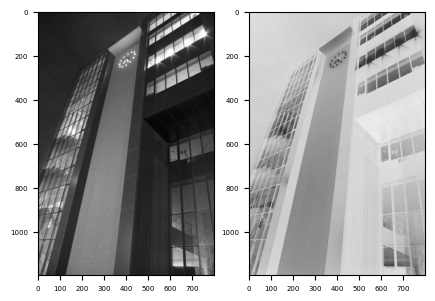

In [388]:
plt.rcParams["font.size"] = 5
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))            # 元画像貼り付け
 
plt.gray()                                                 
plt.subplot(1, 2, 2), plt.imshow(np.uint8(img_out)) # バンドパスフィルタ適用結果
plt.show() 

# EX10
# セグメンテーション
## 以下のコードを任意に編集してセグメンテーションを実行しよう

- 画像img_Ex10_in.jpgを利用すること
- 時計の文字盤・長針・短針・背景の15領域に分けること
- ラベリングはcv2.connectedComponents()を用いる


In [389]:
import numpy as np
import sys
import cv2
import math
import matplotlib.pyplot as plt

In [390]:
#入出力ファイル名指定
fname_in  = "./img_Ex10_in.jpg"

In [391]:
#画像をロード, float型へ変換
img = cv2.imread(fname_in)
H = img.shape[0]
W = img.shape[1]

img = np.float64(img)

In [392]:
#出力画像を準備(float型)
img_gray = np.zeros( (H,W), float )
img_label = np.zeros( (H,W), np.uint8)


In [393]:
#グレースケール化
for y in range(H) :
    for x in range(W) :
        img_gray[y,x] = (img[y,x,0] + img[y,x,1] + img[y,x,2])/3.

In [404]:

#img_labelに文字盤・長針・短針部が255,背景が0になるように編集すること
#ここを編集
for y in range(H) :
    for x in range(W) :
        if img_gray[y,x] < 200:
            img_label[y,x] = 0
        else :
            img_label[y,x] = 255 


In [405]:
#OpenCVの関数によりラベリング　retに領域数，markersにラベリング結果が入る
ret,markers = cv2.connectedComponents(img_label)

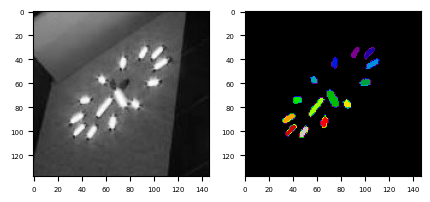

背景を含む領域の数は 15


In [406]:
plt.rcParams["font.size"] = 5
plt.figure(figsize=(5, 5), dpi=100) 
plt.gray() 
plt.subplot(1, 2, 1), plt.imshow(np.uint8(img_gray))            # 元画像貼り付け
                                           
plt.colormaps()
plt.subplot(1, 2, 2), plt.imshow(np.uint8(markers),cmap="nipy_spectral") # 
plt.show() 
print("背景を含む領域の数は",ret)